# GML - Supervised Learning

In diesem Notebook werden verschiedene Supervised Learning-Methoden zur Regression implementiert und verwendet, und es wird Gebrauch von Model Selection-Prinzipien und -Algorithmen gemacht.


**Ridge Regression** ist eine regularisierte Form ($l_2$-Regularisierung) der Ordinary Least Squares (OLS) Kostenfunktion für die lineare Regression.  

Die klassische Ridge Regression-Kostenfunktion für einen Datensatz $(x^{(i)}, y^{(i)})$ mit $x^{(i)} = (x_1^{(i)}, \dots , x_p^{(i)})$ von $N$ Datenpunkten ist gegeben durch: 

\begin{equation}
J(\beta) = \sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)^2 + \alpha\sum_{j=1}^{p} \beta_j^2 
\end{equation}

$(\beta_0, \beta_1, \dots, \beta_p)$ sind dabei die Modellkoeffizienten.

Für die Optimierung der Koeffizienten bei gegebenem Datensatz ergeben sich dadurch Implikationen für Gradient Descent und Normalengleichung.  

Wenn man die **Input-Variablen standardisiert**, was **bei Regularisierung fast immer angezeigt** ist um sämtliche Variablen auf eine vergleichbare Skala (dimensionslose Standardabweichungen) zu bringen, und damit die zugehörigen Koeffizienten in ähnlichem Umfang zu regularisieren, ist es eine Möglichkeit das Optimierungsproblem für $\beta_0$ und die restlichen Variablen zu separieren. $\beta_0$ kann dann nämlich mit $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet werden und ist so unregularisiert. Die Koeffizienten $(\beta_1, \dots, \beta_p)$ werden dann mit Gradient Descent oder Normalengleichen optimiert.

Möchte man alternativ alle Modell-Koeffizienten, inklusive $\beta_0$, mittels Gradient Descent optimieren, so gilt es eine Fallunterscheidung bei der Berechnung des Gradienten zu machen für die Gradienten-Komponente $0$, welche zum Koeffizienten $\beta_0$ gehört, und den verbleibenden Gradienten-Komponenten $1$ bis $p$, welche zu den Modellkoeffizienten $(\beta_1, \dots, \beta_p)$ gehören. Dies deswegen, weil $\beta_0$ nicht in die Strafterm-Summe der Kostenfunktion eingeht.

### Zu Gradient Descent für Ridge Regression

Zur Verwendung von Gradient Descent muss der Gradient der Kostenfunktion berechnet werden. Der Gradient $\nabla f(\chi)$ einer Funktion $f(\cdot)$ mehrerer ($m$) Variablen $\chi = (\chi_1, \chi_2, \dots, \chi_m)$ ist gegeben durch:

\begin{equation}
\nabla f(\chi) = \Big( \frac{\partial f(\chi)}{\partial \chi_1}, \frac{\partial f(\chi)}{\partial \chi_2}, \dots, \frac{\partial f(\chi)}{\partial \chi_m}\Big)
\end{equation}

$\frac{\partial f(\chi)}{\partial \chi_i}$ ist dabei die partielle Ableitung von $f(\cdot)$ nach $\chi_i$. $\nabla f(\chi)$ ist also ein $m$-dimensionaler Vektor.   

Bei Standardisierung der Input-Variablen und separater 'Optimierung' von $\beta_0$ wird $\beta_0$ vorab berechnet, wird dann zur Konstanten in der Kostenfunktion, und muss nicht mehr mitoptimiert werden, i.e. kann beim Gradienten aussen vor gelassen werden.

### Zur Normalengleichung für Ridge Regression

Einen Input-Datensatz können wir als $N \times p+1$ Matrix $\mathbf{X}$ schreiben. $p+1$ deswegen, weil wir den $p$ Input-Variablen noch eine Spalte von $1$-en voranstellen können, um den Koeffizienten $\beta_0$ mit berücksichtigen zu können. Sie hat also die Form

\begin{equation}
\mathbf{X} = 
\begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_j & \cdots & x^{(1)}_p \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_j & \cdots & x^{(2)}_p \\
& & \vdots & &\\
1 & x^{(i)}_1 & x^{(i)}_2 & \cdots & x^{(i)}_j & \cdots & x^{(i)}_p \\
& & \vdots & &\\
1 & x^{(n)}_1 & x^{(n)}_2 & \cdots & x^{(n)}_j & \cdots & x^{(n)}_p
\end{bmatrix}
\end{equation}

Gleichermassen können wir unsere Output-Variablen als $N$-dimensionalen Vektor $y = (y^{(1)}, .. y^{(N)})$ betrachten.  

Damit können wir ein lineares Modell in kompakter Schreibweise wie folgt formulieren:  

\begin{equation}
y = \mathbf{X}\beta + \epsilon
\end{equation}

Wobei $\epsilon = (\epsilon_1, \cdots \epsilon_N)$ ein Vektor von irreduzierbaren Fehlern für die $N$ Datenpunkte ist.

Für die **unregularisierte OLS Kostenfunktion kann eine analytische Lösung** gefunden werden, die als Normalengleichung bezeichnet wird:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^Ty
\end{equation}


Gleichermassen kann für die analytische Lösung der **Ridge Regression Kostenfunktion** folgende analytische Lösung hergeleitet werden:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1}_R)^{-1} \mathbf{X}^Ty
\end{equation}

Möchten wir alle Modellkoeffizienten, inklusive $\beta_0$, auf einmal optimieren, ist $\mathbf{1}_R$ dabei im Grunde die $(p+1 \times p+1)$-dimensionale Einheitsmatrix. Allerdings muss das Element $(0,0)$ gleich $0$ gesetzt, dies um den Koeffizienten $\beta_0$ nicht zu regularisieren. $\mathbf{1}_R$ ist also:


\begin{equation}
\mathbf{1}_r = 
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 & \cdots & 0 \\
& &  & \ddots &  & \vdots &  \\
& \vdots &  &  & \ddots & 0 & 0 \\
0 & 0 & \cdots &  & 0 & 1 & 0 \\
0 & 0 & \cdots &  &  & 0 & 1
\end{bmatrix}
\end{equation}

**Bei standardisierten Inputdaten** kann alternativ auch der oben erwähnte Weg beschritten werden, bei welchem man $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet, die Spalte von $1$-en $\mathbf{X}$ nicht vorangestellt und schliesslich eine Normalengleichung verwendet wird mit unveränderter $(p \times p)$-dimensionaler Einheitsmatrix $\mathbf{1}$:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1})^{-1} \mathbf{X}^Ty
\end{equation}

Die folgende Klasse wurde so vervollständigt, dass sie bei Wahl der entsprechenden Initialisierungsoption die Kostenfunktion der Ridge Regression mit Gradient Descent (gd) oder der regularisierten Normalengleichung (neq) optimiert, und zwar für exakt die Kostenfunktion aus Aufgabe 1.

Es wurde der Entwicklungsdatensatz (Xdev, ydev) verwendet und gezeigt, dass:

die Implementierung für Gradient Descent erfolgreich konvergiert, unterstützt durch eine Visualisierung.
mit Normalengleichung und Gradient Descent praktisch die gleiche (korrekte) Lösung gefunden wird, nachgewiesen durch den Einsatz von np.testing.assert_array_almost_equal.

In [281]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.datasets import make_regression

Xdev, ydev = make_regression(
    n_samples=1000,
    n_features=4,
    random_state=4,
    n_informative=3,
    effective_rank=2,
)


class RidgeRegression(BaseEstimator):
    def __init__(self, opt_method='gd', alpha=1., eta=0.0001, maxsteps=1000, eps=0.0000001): #changed: eta=0.01, maxsteps=100, eps=0.0000001
        '''Implements a Ridge Regression estimator.

        Arguments
        ---------
        alpha:  Regularization proportionality factor. Larger values
                correspond with stronger regularization.
        opt_method: Optimization method to choose for the cost function.
                Can be either 'gd' (Gradient Descent) or 'neq' (Normal equation).
        maxsteps: Maximum number of Gradient Descent steps to take.
        eps:  Epsilon, length of gradient to be reached with Gradient
              Descent.
        eta:  Fixed step length to take at each gradient descent
              iteration.
        '''
        # parameters
        self.alpha = alpha
        self.opt_method = opt_method
        self.maxsteps = maxsteps
        self.eps = eps
        self.eta = eta
        # attributes
        # model coefficients
        self.beta_ = None
        # values of cost function along gradient descent iterations
        self.costs_ = []

    @staticmethod
    def ridge_cost_function(beta, X, y, alpha):
        '''Computes and returns the value of the ridge regression cost function.
        '''
        pen = alpha * np.sum(beta[1:] ** 2)  # Penalty term 
        cost = np.sum((y - beta[0] - np.dot(X, beta[1:])) ** 2) + pen
        return cost

    @staticmethod
    def ridge_gradient(beta, X, y, alpha):
        '''Computes and returns the gradient of the ridge regression cost function.
        '''
        grad_beta0 = -2 * np.sum(y - beta[0] - X @ beta[1:]) 
        grad_betaj = ((-2) * np.dot(X.T, y - X @ beta[1:])) + 2 * alpha * beta[1:]
        gradient = np.hstack((grad_beta0, grad_betaj))
     
        return gradient

    def ridge_normalequation(self, X, y):
        X_ = np.hstack((np.ones((X.shape[0], 1)), X))
        A = X_.T @ X_ + self.alpha * np.eye(X_.shape[1])
        b = X_.T @ y
        try:
            self.beta_ = np.linalg.solve(A, b)
        except np.linalg.LinAlgError:
            self.beta_ = np.linalg.pinv(A) @ b

    def fit(self, X, y):
        
        if self.opt_method == 'gd':
            self.gradient_descent(X, y)
        elif self.opt_method == 'neq':
            self.ridge_normalequation(X, y)
        else:
            raise ValueError("Invalid optimization method")
        return self

    def gradient_descent(self, X, y):
        '''Computes the coefficients of the ridge regression cost function
        using gradient descent.
        '''
        m = X.shape[1]
        beta = np.zeros(m+1)
        step = 0
        for i in range(self.maxsteps):
            grad = self.ridge_gradient(beta, X, y, self.alpha)
            beta -= self.eta * grad
            cost = self.ridge_cost_function(beta, X, y, self.alpha)
            self.costs_.append(cost)
            if np.linalg.norm(grad) < self.eps:
                break

            i += 1
        self.beta_ = beta
        self.beta_[0] = np.mean(y)
        
        return self

    def predict(self, X):
        '''Computes the predictions of the current model.
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.beta_
        

    def score(self, X, y):
        '''Returns R^2 for given input/output data given the model
        coefficients.
        '''
        return 1 - (np.sum((y - self.predict(X)) ** 2) / np.sum((y - y.mean()) ** 2))

    @staticmethod
    def approximate_gradient(beta, X, y, alpha, epsilon=0.00001):
        '''Approximates the gradient with finite differences.
        
        You can use this method to check your gradident.
        '''
        X_ = np.hstack((np.ones((X.shape[0], 1)), X))
        grad_approx = []
        cf = RidgeRegression.ridge_cost_function
        for i, b in enumerate(beta):
            eps = np.zeros(beta.shape[0])
            eps[i] += epsilon
            grad_approx.append(
                (cf(beta + eps, X_, y, alpha) - cf(beta - eps, X_, y, alpha)) / (2 * epsilon)
            )
            
        return np.array(grad_approx)


Bei Alpha= 1.0 konvergieren die Kosten zu 4.523691503878927


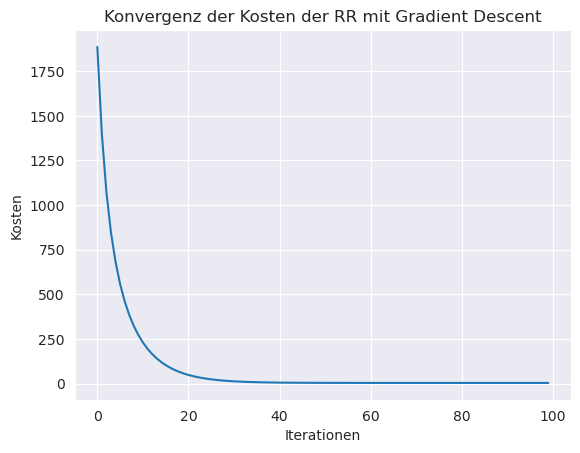

In [282]:
import matplotlib.pyplot as plt
#--------------Standardisieren:--------------
X1 = np.mean(Xdev, axis=0)
X2 = np.std(Xdev, axis=0)
X_stand = (Xdev - X1)/X2

#--------------Model erstellen, betas berechnen:--------------
model = RidgeRegression(opt_method='gd',alpha=1., eta=0.0001, maxsteps=100, eps=0.000001) # smaller alpha = converges closer to 0
model.fit(X_stand, ydev)
print(f'Bei Alpha= {model.alpha} konvergieren die Kosten zu {model.costs_[-1]}')
#--------------Plotten:--------------
plt.plot(model.costs_)
plt.xlabel('Iterationen')
plt.ylabel('Kosten')
plt.title('Konvergenz der Kosten der RR mit Gradient Descent')
plt.show()



Die Kosten (y-Achse) sinken wie erwartet im Verlauf der Iterationen (X-Achse) und konvergieren zu einer tiefen Zahl. Je tiefer alpha, desto kleiner die Zahl, zu der die Kosten konvergieren.

In [283]:
#--------------Vergleich Gradient Descent mit Normalengleichung--------------
model_neq = RidgeRegression(opt_method='neq').fit(X_stand, ydev)
model_gd = RidgeRegression(opt_method='gd').fit(X_stand, ydev)

np.testing.assert_array_almost_equal(model_gd.beta_, model_neq.beta_, decimal=5)

print(model_gd.beta_)
print(model_neq.beta_)
print("Normal Equation and Gradient Descent solutions are practically equal.")


[3.36682696e-03 8.44489435e-01 1.34721210e-03 7.20127150e-01
 1.81163886e+00]
[3.36346349e-03 8.44489435e-01 1.34721205e-03 7.20127150e-01
 1.81163886e+00]
Normal Equation and Gradient Descent solutions are practically equal.


### Einfluss von Alpha

Mit Hilfe des ersten Codeblocks wurde ein einfacher kleiner Datensatz ([Xdev, ydev]) erzeugt. 
Ein polynomiales Regressionsmodell vom Grade 15 wurde für diese Daten erstellt und die Vorhersagen auf dem Intervall der vorhandenen Datenpunkte als Linie zusammen mit den Daten als Punkte in einen Plot gezeichnet.

Anschließend wurde Ridge Regression verwendet, um das polynomiale Regressionsmodell vom Grade 15 zu regularisieren. Drei sinnvolle Regularisierungsstärken wurden ausgewählt, um den Effekt der Regularisierung zu illustrieren. Diese Effekte wurden erklärt und diskutiert.

Mit Hilfe des ersten Codeblocks wurde ein einfacher kleiner Datensatz ([Xdev, ydev]) erzeugt. 
Dannach wurde ein polynomiales Regressionsmodell vom Grade 15  für diese Daten erstellt und die Vorhersagen auf dem Intervall der vorhandenen Datenpunkte als Linie zusammen mit den Daten als Punkte in einen Plot gezeichnet.

Anschließend wurde Ridge Regression verwendet, um das polynomiale Regressionsmodell vom Grade 15 zu regularisieren. Drei sinnvolle Regularisierungsstärken wurden ausgewählt, um den Effekt der Regularisierung zu illustrieren. Diese Effekte wurden erklärt und diskutiert.

In [284]:
import numpy as np
import matplotlib.pyplot as plt
NPOINTS = 20
RND_SEED = 4
np.random.seed(RND_SEED)
Xdev = np.random.rand(NPOINTS)*10
np.random.seed(RND_SEED)
ydev = 0.1*Xdev**3+4*Xdev**2-Xdev+2+np.random.randn(NPOINTS)*50
Xdev = Xdev.reshape(-1,1)

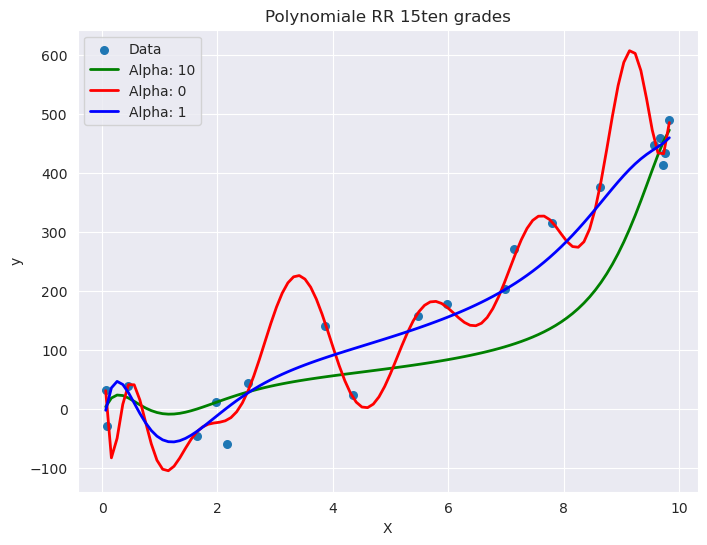

In [285]:
def create_polynomial_features(X, degree):
    X_poly = np.ones_like(X)  #initialize
    for power in range(1, degree + 1):  
        X_poly = np.column_stack((X_poly, X**power))
    X_poly = X_poly[:,1:]
    return X_poly

degree = 15
#--------------Standardisieren:--------------
X1 = np.mean(Xdev, axis=0)
X2 = np.std(Xdev, axis=0)
X_stand =(Xdev-X1)/X2

#--------------Polynomialisieren & Verteilen:--------------
X_polynomialisiert = create_polynomial_features(X_stand, degree)
X_spaced = np.linspace(X_stand.min(), X_stand.max(), 100).reshape(-1, 1)
X_spaced_poly = create_polynomial_features(X_spaced, degree)
X_spaced_unscaled = np.linspace(Xdev.min(), Xdev.max(), 100).reshape(-1, 1)

#--------------Modelle erstellen & Plotten:--------------
alphas = [0, 1, 10]
colors = ['red','blue','green']

plt.figure(figsize=(8, 6))
plt.scatter(Xdev, ydev, s=30, label='Data')

for i in range(len(alphas)):
    model = RidgeRegression(opt_method='neq', alpha=alphas[i-1],eta=0.0001, maxsteps=1000)
    model.fit(X_polynomialisiert, ydev)
    predicted = model.predict(X_spaced_poly)
    plt.plot(X_spaced_unscaled, predicted, color=colors[i-1], linewidth=2, label=f'Alpha: {alphas[i-1]}')
     
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomiale RR {degree}ten grades')
plt.legend()
plt.show()

Die blauen Punkte zeigen die tatsächlichen y Werte. Wenn alpha auf 0 (rote Linie) gesetzt wird, sind die Vorhersagen am genausten für den Datensatz mit dem das Model trainiert wurde. Es gibt dadurch starke Schwankungen in der Kurve und teilweise gehen die Vorhersagen für Punkte zwischen den Test-Datenpunkten stark über die Datenpunke in der Nähe (X=3.5 & X= 9). <br/>
Wenn man 1 als Alpha verwendet (blaue Linie), wird die Kurve bereits stark abgeflacht und die Vorhersagen durchqueren die tatsächlichen Datenpunkte nicht mehr so genau. Sie geht jedoch trotzdem immer in die richtige Richtung in der Nähe der Datenpunkte mit und beschreiben den ungefären "Trend" der Daten. <br/>
Die grüne Linie hat ein Alpha von 10, Sie hat keine starken Schwankungen mehr drinn und ist am weitesten weg, von den tatsächlichen Daten im Trainingsdatensatz. <br/>
<br/>
Im Trainingsdatensatz scheint die rote Linie die besten Vorhersagen zu treffen, würde man jedoch nun dieses Model auf einen anderen Datensatz (Testdatensatz) anwenden, würde es mit hoher Wahrscheinlichkeit die Daten sehr schlecht vorhersagen, da es viel zu stark variiert. Eine bessere allgemeine Aussage für andere Daten kann mit dem Alpha von 1 gemacht, es variiert nicht so stark und ist in der Mitte von stark verstreuten Daten. Die grüne Linie könnte evt. schon zu stark reguliert sein, dies sieht man insbesonder zwischen x = 6-9, wo es stark unter allen Daten liegt.
<br/>
Es kann hier jedoch keine allgemeine Aussage gemacht werden welches alpha das Beste ist. Dies hängt immer von den Daten ab und muss herausgefunden werden, indem mann Trainingsdaten mit einem gewissen alpha trainiert, und dann mit diesen Koeffizienten schaut, wie genau die Vorhersagen auf einen Testdatensatz zutreffen.

### Lasso

#### Frage:

Betrachten wir anstelle der Ridge Regression Kostenfunktion Lasso, so können wir nicht genauso Gradient Descent verwenden, um die Modellkoeffizienten zu optimieren. Wie schaut die Lasso Kostenfunktion aus und warum ist dies nicht möglich? Wie verändern sich die Eigenschaften der Lösung, i.e. der Koeffizienten?

#### Antwort

Die Lasso Kostenfunktion ist gleich wie die der Ridge Regression bis auf den Penalty Term. Anstatt das Quadrat aller Beta's wird der Betrag davon genommen:

\begin{equation}
J(\beta) = \sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)^2 + \alpha \sum_{j=1}^{p} |\beta_j|
\end{equation}

Einfluss auf Gradient Descent:
Der Betrag von $\beta$ verursacht eine Ecke in dem Funktiongraphen worann man sieht, dass die Lasso Kostenfunktion am Punkt $\beta$ = 0 nicht differenzierbar ist. Für den Gradient Descent muss man die Kostenfunktion ableiten, weil aber der Punkt $\beta$ = 0 nicht differenzierbar ist, ist die Ableitung an diesem Punkt undefiniert. Dies unterbricht den sonst glatten Abstieg der Kurve und verhindert den weiteren Abstieg.


Der Koeffizientenpfad der Ridge Regression-Implementierung und jener von Lasso wurde auf dem Entwicklungsdatensatz berechnet und gezeichnet. Auf der x-Achse wurde der negative Logarithmus der Regularisierungsstärke $\alpha$ dargestellt. Für die Lasso-Implementierung wurde die entsprechende scikit-learn-Klasse verwendet. 


In [286]:
import numpy as np
import matplotlib.pyplot as plt
NPOINTS = 20
RND_SEED = 4
np.random.seed(RND_SEED)
Xdev = np.random.rand(NPOINTS)*10
np.random.seed(RND_SEED)
ydev = 0.1*Xdev**3+4*Xdev**2-Xdev+2+np.random.randn(NPOINTS)*50
Xdev = Xdev.reshape(-1,1)

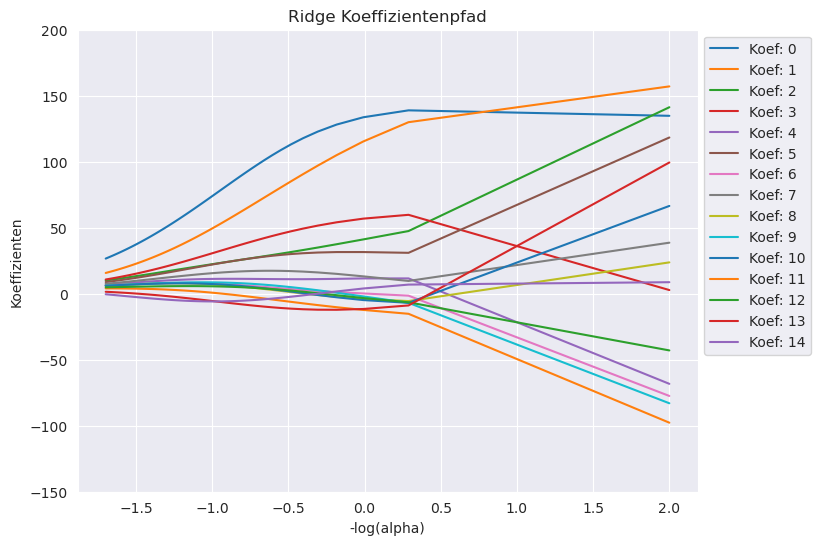

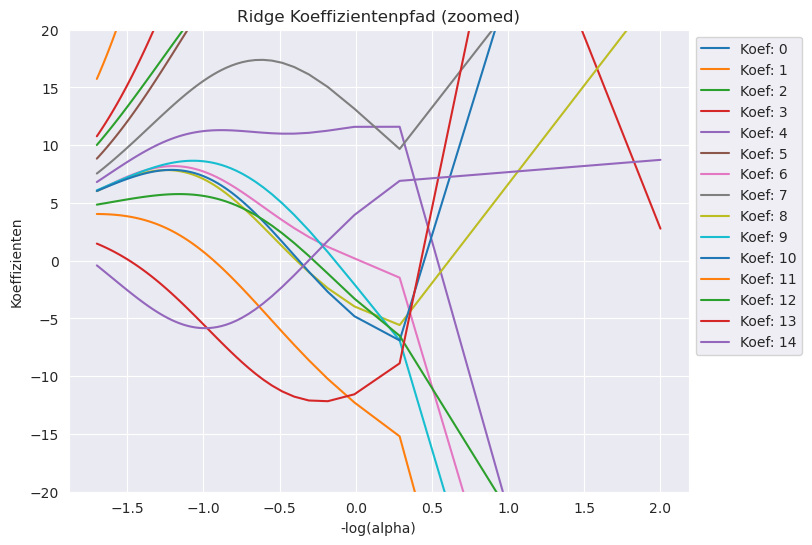

In [287]:
degree = 15
#--------------Standardisieren:--------------
X1 = np.mean(Xdev, axis=0)
X2 = np.std(Xdev, axis=0)
X_stand =(Xdev-X1)/X2
#--------------Polynomialisieren:--------------
X_polynomialisiert = create_polynomial_features(X_stand, degree)

#--------------iniziieren:--------------
alphas = np.linspace(0.01, 50, 100)    #für bessere genauigkeit recht, dritten Wert erhöhen oder zweiten Wert vertiefen
ridge_betas = np.zeros(len(X_polynomialisiert[0]) +1)

#--------------Modelle mit verschiedenen alphas erstellen:--------------
for alpha in alphas:
    model = RidgeRegression(opt_method='neq', alpha=alpha)
    model.fit(X_polynomialisiert, ydev)
    ridge_betas =  np.vstack((ridge_betas, model.beta_))

#--------------Modelle mit verschiedenen alphas erstellen & Plotten:--------------
log_alphas = -np.log10(alphas)
ridge_betas = ridge_betas[1:]

plt.figure(figsize=(8, 6))
for alpha in range(len(ridge_betas[1])-1):
    plt.plot(log_alphas, ridge_betas[:,alpha], label=f'Koef: {alpha}')
    
plt.xlabel('-log(alpha)')
plt.ylabel('Koeffizienten')
plt.ylim(-150, 200)
plt.title('Ridge Koeffizientenpfad')
plt.legend(loc='best', bbox_to_anchor=(1.,1.))
plt.show()
#--------------zu 0 hereinzoomen:--------------

plt.figure(figsize=(8, 6))
for alpha in range(len(ridge_betas[1])-1):
    plt.plot(log_alphas, ridge_betas[:,alpha], label=f'Koef: {alpha}')
plt.xlabel('-log(alpha)')
plt.ylabel('Koeffizienten')
plt.ylim(-20, 20)
plt.title('Ridge Koeffizientenpfad (zoomed)')
plt.legend(loc='best', bbox_to_anchor=(1.,1.))
plt.show()

Reminder: durch -log($\alpha$) sind hohe $\alpha$-Werte links (100= -2) und niedrige rechts(0.0001=4)

Hier werden die Werte der Koeffizienten gezeigt, welche bei der Ridge Regression mit den $\alpha$-Werten 0.01 bis 50 in 100 Schritten generiert wurden. Jeder Koeffizient hat eine Linie mit eigener Farbe. Für die Darstellung wurde auf der x-Achse der -log von $\alpha$ genommen, dadurch ist der Nachteil entstanden, dass die Kurven ab -log($\alpha$) von 0.288 nur noch geraden da es einen Sprung von -log(0.01) = 2 und dem nächsten Punkt -log(0.515) = 0.288. Um genauere Resultate in diesem Bereich zu sehen müssten mehr $\alpha$ gesetzt werden oder eine niedrigere range (siehe Kommentar Code). Ich habe es jedoch erstmal bei diesen Werten belassen, weil sie das wichtige in dieser Aufgabe (hohe $\alpha$-Werte) genau zeigen.<br/>
<br/>
In der ersten Abbildung ist zu sehen, dass die Koeffizient bei tiefen $\alpha$, höhere Betragswerte annehmen und bei tieferen $\alpha$ näher zu 0 gelangen. <br/>
In der zweiten Abbildung kann man den 0-Bereich besser sehen. Es wird ersichtlich, dass die Werte null Kreuzen, jedoch niemal 0 bleiben.

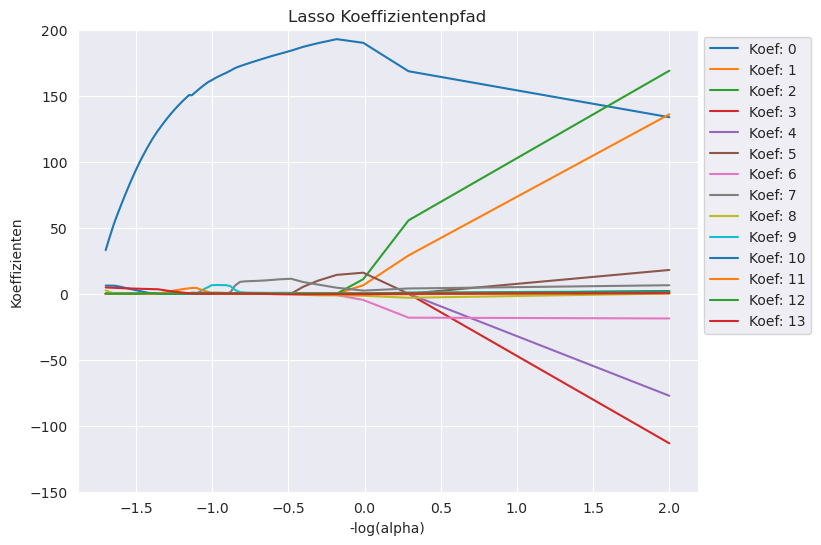

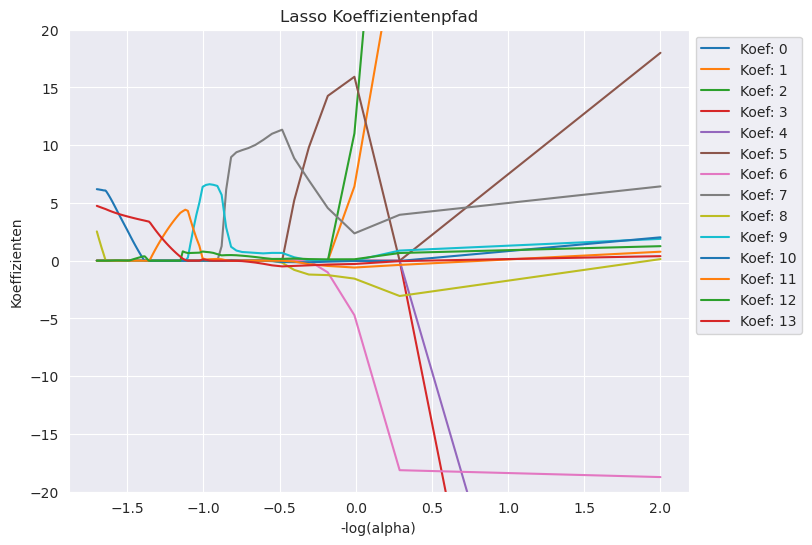

In [288]:
from sklearn.linear_model import Lasso

#--------------Modelle mit verschiedenen alphas erstellen:--------------
lasso_betas = np.zeros(len(X_polynomialisiert[0]-1))
plt.figure(figsize=(8, 6))
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True, max_iter=10000,tol=0.015)
    lasso.fit(X_polynomialisiert, ydev)
    lasso_betas = np.vstack((lasso_betas, lasso.coef_))
    
lasso_betas = lasso_betas[1:]
log_alphas = -np.log10(alphas)

#--------------Plotten:--------------
for alpha in range(len(lasso_betas[1])-1):
    plt.plot(log_alphas, lasso_betas[:,alpha], label=f'Koef: {alpha}')
    
plt.xlabel('-log(alpha)')
plt.ylabel('Koeffizienten')
plt.ylim(-150, 200)
plt.title('Lasso Koeffizientenpfad')
plt.legend(loc='best', bbox_to_anchor=(1.,1.))
plt.xlabel('-log(alpha)')
#--------------zu 0 hereinzoomen:--------------
plt.figure(figsize=(8, 6))
for alpha in range(len(lasso_betas[1])-1):
    plt.plot(log_alphas, lasso_betas[:,alpha], label=f'Koef: {alpha}')
plt.xlabel('-log(alpha)')
plt.ylabel('Koeffizienten')
plt.ylim(-20, 20)
plt.title('Lasso Koeffizientenpfad')
plt.legend(loc='best', bbox_to_anchor=(1.,1.))
plt.show()

Reminder: durch -log($\alpha$) sind hohe $\alpha$-Werte links (100= -2) und niedrige rechts(0.0001=4)

Diese Abbildung sind gleich Aufgebaut, wie die zuvor, jedoch wurden nun die Koeffizienten mit dem Lasso-Modell von scikit.learn generiert.<br/>
In der ersten Abbildung ist zu sehen, dass der ungefähre Verlauf der Koeffizienten-Werte, ähnlich ist wie bei der Ridge Regression. Einige Werte sind jedoch näher bei 0-Bereich. Koeffizienten, welche schon bei der Ridge Regression hohe Werte hatten (Koef 0,1 & 2), wurden bei Lasso noch mehr verstärkt.<br/>
In der zweiten Abbildung wurde wieder zu 0 herangezoomed. Es wird ersichtlich, dass viele Koeffizienten stärker herabgesetzt wurden und einige sogar zu 0 gesetzt wurden 

#### Interpretation der Grafiken

In beiden Grafiken ist zu erkennen, dass die Koeffizienten (betas) der meisten Merkmale (xi) mit zunehmender Regularisierung abnehmen. 

Starke Regularisierung (hohe $\alpha$) zwingt die Koeffizienten gegen Null.
Beim Lasso Koeffizientenpfad gibt es einige Merkmale, deren Koeffizienten nicht abnehmen, sondern sogar ansteigen, wenn die Regularisierung zunimmt. Dies sind die Merkmale, die am wichtigsten für die Vorhersage der Zielvariablen sind. In meinem Beispiel waren dies vorallem Koeffizient 0, 1 & 2. Das Lasso-Modell wählt diese Merkmale aus, indem es ihre Koeffizienten von Null abhebt, während die Koeffizienten der weniger wichtigen Merkmale auf Null gesetzt werden. Bei der Ridge Regression werden die Koeffizienten nie ganz auf Null gesetzt.

Wann ist Lasso also interessant?

Lasso-Regression ist eine gute Wahl, wenn ein Modell mit geringer Komplexität werden soll, das gut interpretierbar ist. Das Modell kann auch verwendet werden, um irrelevante und relevante Merkmale zu identifizieren.

### Datenanalyse

Der Datensatz data/Mini.csv wurde geladen und mithilfe explorativer Datenanalyse ausgewertet. Ziel ist es, mithilfe der übrigen Attribute den Preis (Offers Price) der PKW vorherzusagen.

Der Datensatz wurde anschließend für die weiteren Aufgaben in Trainings- und Testdaten (80:20) unterteilt.

In [289]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('data/Mini.csv', sep=";")
df.head()
#raise NotImplementedError()

,Modell,Year,Milage [km],Offers Price [CHF],Transmission,Engine Power [HP]
0,MINI Cooper JCW Cabriolet,6.2021,6300,39900,Automatic,231
1,MINI Cooper JCW Cabriolet,3.2024,10,52100,Manual,231
2,MINI Cooper S JCW Cabriolet,3.2024,10,48100,Semiautomatic,178
3,MINI Cooper S JCW Cabriolet,3.2024,10,45900,Semiautomatic,178
4,MINI Cooper Cabriolet,4.2021,20200,27700,Manual,136


##### Spaltentitel

In [290]:
#Spaltennamen haben Leerzeichen am Anfang oder Schluss drin:
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()
df.info() #keine null; welche Spalte hat welchen Dtype; Haben alle den angemessenen Dtype ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Modell              143 non-null    object 
 1   Year                143 non-null    float64
 2   Milage [km]         143 non-null    int64  
 3   Offers Price [CHF]  143 non-null    int64  
 4   Transmission        143 non-null    object 
 5   Engine Power [HP]   143 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 6.8+ KB


In [291]:
# Spaltennamen einfacher für zukünftige Nutzung machen
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df.columns = df.columns.str.replace("Milage \[km\]", "Milage")
df.columns = df.columns.str.replace('Offers Price \[CHF\]', 'Price')
df.columns = df.columns.str.replace('Engine Power \[HP\]', 'HP')
df.columns #für Copy Paste

Index(['Modell', 'Year', 'Milage', 'Price', 'Transmission', 'HP'], dtype='object')

In [292]:
df.Modell = df.Modell.astype('string')
df.Transmission = df.Transmission.astype('string')
#df.info() 

In [293]:
#df.head()

In [294]:
df.info()  # hat keine null Werte => gut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Modell        143 non-null    string 
 1   Year          143 non-null    float64
 2   Milage        143 non-null    int64  
 3   Price         143 non-null    int64  
 4   Transmission  143 non-null    string 
 5   HP            143 non-null    int64  
dtypes: float64(1), int64(3), string(2)
memory usage: 6.8 KB


#### Model

In [295]:
df.Modell.value_counts() #schauen ob es Schreibfehler bei Modell hat;

Mini Cooper Cabriolet S                    53
Mini Cooper Cabriolet                      35
Mini Cooper John Cooper Works Cabriolet    21
Mini Cooper Cabriolet One                  10
Mini Cooper JCW Cabriolet                   9
Mini Cooper 1.3i                            6
 MINI Cooper JCW Cabriolet                  2
 MINI Cooper S JCW Cabriolet                2
Mini Cooper Cabriolet Brighton S            2
 MINI Cooper Cabriolet                      1
Mini Cooper 1.6i Cabriolet                  1
Mini Cooper S JCW Cabriolet                 1
Name: Modell, dtype: Int64

In [296]:
df.Modell = df.Modell.str.strip() #Leerschläge korrigieren
df.Modell.value_counts()

Mini Cooper Cabriolet S                    53
Mini Cooper Cabriolet                      35
Mini Cooper John Cooper Works Cabriolet    21
Mini Cooper Cabriolet One                  10
Mini Cooper JCW Cabriolet                   9
Mini Cooper 1.3i                            6
MINI Cooper JCW Cabriolet                   2
MINI Cooper S JCW Cabriolet                 2
Mini Cooper Cabriolet Brighton S            2
MINI Cooper Cabriolet                       1
Mini Cooper 1.6i Cabriolet                  1
Mini Cooper S JCW Cabriolet                 1
Name: Modell, dtype: Int64

In [297]:
def replace_MINI(text):
    return text.replace("MINI", "Mini")

df.Modell = df.Modell.apply(replace_MINI)
df.Modell = df.Modell.replace("Mini Cooper John Cooper Works Cabriolet", "Mini Cooper JCW Cabriolet") 
df.Modell.value_counts()

Mini Cooper Cabriolet S             53
Mini Cooper Cabriolet               36
Mini Cooper JCW Cabriolet           32
Mini Cooper Cabriolet One           10
Mini Cooper 1.3i                     6
Mini Cooper S JCW Cabriolet          3
Mini Cooper Cabriolet Brighton S     2
Mini Cooper 1.6i Cabriolet           1
Name: Modell, dtype: int64

In [298]:
df = pd.get_dummies(df, columns=['Modell'], prefix=['Modell'], dtype=int) 
df.head()

,Year,Milage,Price,Transmission,HP,Modell_Mini Cooper 1.3i,Modell_Mini Cooper 1.6i Cabriolet,Modell_Mini Cooper Cabriolet,Modell_Mini Cooper Cabriolet Brighton S,Modell_Mini Cooper Cabriolet One,Modell_Mini Cooper Cabriolet S,Modell_Mini Cooper JCW Cabriolet,Modell_Mini Cooper S JCW Cabriolet
0,6.2021,6300,39900,Automatic,231,0,0,0,0,0,0,1,0
1,3.2024,10,52100,Manual,231,0,0,0,0,0,0,1,0
2,3.2024,10,48100,Semiautomatic,178,0,0,0,0,0,0,0,1
3,3.2024,10,45900,Semiautomatic,178,0,0,0,0,0,0,0,1
4,4.2021,20200,27700,Manual,136,0,0,1,0,0,0,0,0


#### Year

Noch nicht optimal: Monat geht verloren

In [299]:
from datetime import date

def calculate_age(year_float):
    year_str = '{:.4f}'.format(year_float)
    month, year = map(int, year_str.split('.'))
    today = date(2025,1,1)  #Da das Alter der Daten eine Rolle spielt ist ein fixes Datum besser als z.B. date.today() 
    deziMonth = 1/ (12 / month)
    age = (today.year - year) - deziMonth
    return age
'''testlist = [06.2023,05.2023,04.2023,03.2023,02.2023,01.2023,12.2022,11.2022,10.2022,09.2022,08.2022,07.2022,06.2022,05.2022,04.2022,03.2022,02.2022,01.2022,12.2021,11.2021]
testframe = pd.DataFrame({'Year': testlist})
testframe['Age'] = testframe['Year'].apply(calculate_age)
testframe'''
df['Age'] = df['Year'].apply(calculate_age)

print(df.loc[:, ['Year', 'Age']])


        Year        Age
0     6.2021   3.500000
1     3.2024   0.750000
2     3.2024   0.750000
3     3.2024   0.750000
4     4.2021   3.666667
5     5.2016   8.583333
6     6.2022   2.500000
7     8.1995  29.333333
8    12.1997  27.000000
9     1.1998  26.916667
10    7.1998  26.416667
11    8.1998  26.333333
12    1.2000  24.916667
13    7.2004  20.416667
14    7.2004  20.416667
15    7.2004  20.416667
16    9.2004  20.250000
17   12.2004  20.000000
18    3.2005  19.750000
19    3.2005  19.750000
20    5.2005  19.583333
21    6.2005  19.500000
22    6.2005  19.500000
23    6.2005  19.500000
24    6.2005  19.500000
25    7.2005  19.416667
26    8.2005  19.333333
27    2.2006  18.833333
28    3.2006  18.750000
29    5.2006  18.583333
30    6.2006  18.500000
31    6.2006  18.500000
32    7.2006  18.416667
33    8.2006  18.333333
34    9.2006  18.250000
35    9.2006  18.250000
36    2.2007  17.833333
37    4.2007  17.666667
38    4.2007  17.666667
39    5.2007  17.583333
40    7.2007  17

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     143 non-null    float64
 1   Milage                                   143 non-null    int64  
 2   Price                                    143 non-null    int64  
 3   Transmission                             143 non-null    string 
 4   HP                                       143 non-null    int64  
 5   Modell_Mini Cooper 1.3i                  143 non-null    int64  
 6   Modell_Mini Cooper 1.6i Cabriolet        143 non-null    int64  
 7   Modell_Mini Cooper Cabriolet             143 non-null    int64  
 8   Modell_Mini Cooper Cabriolet Brighton S  143 non-null    int64  
 9   Modell_Mini Cooper Cabriolet One         143 non-null    int64  
 10  Modell_Mini Cooper Cabriolet S           143 non-n

In [301]:
df.drop(columns=['Year'], inplace=True)
df.Age = df.Age.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Milage                                   143 non-null    int64 
 1   Price                                    143 non-null    int64 
 2   Transmission                             143 non-null    string
 3   HP                                       143 non-null    int64 
 4   Modell_Mini Cooper 1.3i                  143 non-null    int64 
 5   Modell_Mini Cooper 1.6i Cabriolet        143 non-null    int64 
 6   Modell_Mini Cooper Cabriolet             143 non-null    int64 
 7   Modell_Mini Cooper Cabriolet Brighton S  143 non-null    int64 
 8   Modell_Mini Cooper Cabriolet One         143 non-null    int64 
 9   Modell_Mini Cooper Cabriolet S           143 non-null    int64 
 10  Modell_Mini Cooper JCW Cabriolet         143 non-null    int64

In [302]:
df.Age.min() # looks possible

0

In [303]:
df.Age.max() # looks possible

29

#### Milage

In [304]:
df.Milage.describe()  
# min, max sind nicht unmöglich
# int, daher keine Leerschlag-korrektur

count       143.000000
mean      88531.678322
std       57634.908289
min          10.000000
25%       41400.000000
50%       85000.000000
75%      131000.000000
max      264000.000000
Name: Milage, dtype: float64

#### Offers Price

In [305]:
df.Price.describe()
# min, max sind nicht unmöglich
# int, daher keine leerschlag-korrektur

count      143.000000
mean     17534.181818
std      12244.193859
min       1700.000000
25%       7500.000000
50%      13800.000000
75%      27100.000000
max      52100.000000
Name: Price, dtype: float64

#### Transmission

In [306]:
df.Transmission.value_counts() #schauen ob es Schreibfehler bei Transmission hat;

Manual           81
Automatic        46
Semiautomatic    16
Name: Transmission, dtype: Int64

In [307]:
#Transmission can be placed into order, is therefore ordinary data. According to this, I best use Label Encoding
model_mapper = {'Manual': '1', 'Semiautomatic': '2', 'Automatic': '3'}
df.Transmission = df.Transmission.replace(model_mapper)
df.Transmission = df.Transmission.astype('uint8')
df.head()

,Milage,Price,Transmission,HP,Modell_Mini Cooper 1.3i,Modell_Mini Cooper 1.6i Cabriolet,Modell_Mini Cooper Cabriolet,Modell_Mini Cooper Cabriolet Brighton S,Modell_Mini Cooper Cabriolet One,Modell_Mini Cooper Cabriolet S,Modell_Mini Cooper JCW Cabriolet,Modell_Mini Cooper S JCW Cabriolet,Age
0,6300,39900,3,231,0,0,0,0,0,0,1,0,3
1,10,52100,1,231,0,0,0,0,0,0,1,0,0
2,10,48100,2,178,0,0,0,0,0,0,0,1,0
3,10,45900,2,178,0,0,0,0,0,0,0,1,0
4,20200,27700,1,136,0,0,1,0,0,0,0,0,3


#### Engine Power

In [308]:
df.HP.describe()
# min, max sind nicht unmöglich
# int, daher keine leerschlag-korrektur

count    143.000000
mean     164.727273
std       46.498399
min       63.000000
25%      121.000000
50%      175.000000
75%      192.000000
max      231.000000
Name: HP, dtype: float64

In [309]:
df.columns

Index(['Milage', 'Price', 'Transmission', 'HP', 'Modell_Mini Cooper 1.3i',
       'Modell_Mini Cooper 1.6i Cabriolet', 'Modell_Mini Cooper Cabriolet',
       'Modell_Mini Cooper Cabriolet Brighton S',
       'Modell_Mini Cooper Cabriolet One', 'Modell_Mini Cooper Cabriolet S',
       'Modell_Mini Cooper JCW Cabriolet',
       'Modell_Mini Cooper S JCW Cabriolet', 'Age'],
      dtype='object')

In [310]:
# y (Price) nach hinten um besser ersichtlich zu machen
df = df[['Age', 'Milage', 'Transmission', 'HP', 
       'Modell_Mini Cooper 1.3i', 'Modell_Mini Cooper 1.6i Cabriolet',
       'Modell_Mini Cooper Cabriolet',
       'Modell_Mini Cooper Cabriolet Brighton S',
       'Modell_Mini Cooper Cabriolet One', 'Modell_Mini Cooper Cabriolet S',
       'Modell_Mini Cooper JCW Cabriolet',
       'Modell_Mini Cooper S JCW Cabriolet','Price']]
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Age                                      143 non-null    int64
 1   Milage                                   143 non-null    int64
 2   Transmission                             143 non-null    uint8
 3   HP                                       143 non-null    int64
 4   Modell_Mini Cooper 1.3i                  143 non-null    int64
 5   Modell_Mini Cooper 1.6i Cabriolet        143 non-null    int64
 6   Modell_Mini Cooper Cabriolet             143 non-null    int64
 7   Modell_Mini Cooper Cabriolet Brighton S  143 non-null    int64
 8   Modell_Mini Cooper Cabriolet One         143 non-null    int64
 9   Modell_Mini Cooper Cabriolet S           143 non-null    int64
 10  Modell_Mini Cooper JCW Cabriolet         143 non-null    int64
 11  Modell

#### Split Dataset

In [311]:
n_samples = len(df)
train_size = 0.8 
split_index = int(n_samples * train_size) 
df2 = df.sample(frac=1, random_state=42).reset_index(drop=True) 

train = df2.iloc[:split_index, :]
test = df2.iloc[split_index:, :]
train = train.sort_values(by='Price')
test = test.sort_values(by='Price')
test.head()

,Age,Milage,Transmission,HP,Modell_Mini Cooper 1.3i,Modell_Mini Cooper 1.6i Cabriolet,Modell_Mini Cooper Cabriolet,Modell_Mini Cooper Cabriolet Brighton S,Modell_Mini Cooper Cabriolet One,Modell_Mini Cooper Cabriolet S,Modell_Mini Cooper JCW Cabriolet,Modell_Mini Cooper S JCW Cabriolet,Price
124,17,230000,1,115,0,0,1,0,0,0,0,0,1700
140,20,220000,1,115,0,0,1,0,0,0,0,0,2400
137,19,157000,1,90,0,0,0,0,1,0,0,0,4200
119,18,155000,1,90,0,0,0,0,1,0,0,0,4500
117,15,190000,1,175,0,0,0,0,0,1,0,0,7500


In [312]:
test.head()

,Age,Milage,Transmission,HP,Modell_Mini Cooper 1.3i,Modell_Mini Cooper 1.6i Cabriolet,Modell_Mini Cooper Cabriolet,Modell_Mini Cooper Cabriolet Brighton S,Modell_Mini Cooper Cabriolet One,Modell_Mini Cooper Cabriolet S,Modell_Mini Cooper JCW Cabriolet,Modell_Mini Cooper S JCW Cabriolet,Price
124,17,230000,1,115,0,0,1,0,0,0,0,0,1700
140,20,220000,1,115,0,0,1,0,0,0,0,0,2400
137,19,157000,1,90,0,0,0,0,1,0,0,0,4200
119,18,155000,1,90,0,0,0,0,1,0,0,0,4500
117,15,190000,1,175,0,0,0,0,0,1,0,0,7500


In [313]:
train.Age.min()

0

### Residuenanalyse

Im folgenden wurde eine Residuenanalye gemacht und damit untersucht welchen Einfluss Variablen-Transformation auf die Datenverteilung hat.

Dafür wird ein erstes einfaches lineares Modell für Offers Price mit der einen Input-Variablen Mileage erstellt.


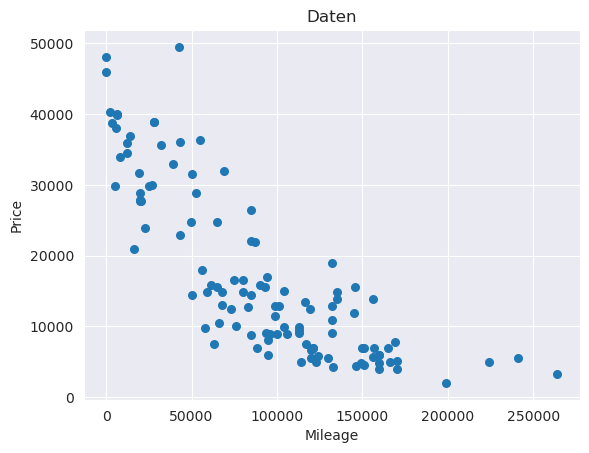

In [314]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#-----------Datenverteilung anschauen------------------------------------
plt.scatter(train.Milage,train.Price, s= 30, label='Data')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Daten')
plt.show()

Hier ist bereits ersichtlich, dass für Autos mit viel Meilen wenig Daten vorhanden sind. Die restliche Verteilung sieht nicht schlecht aus.

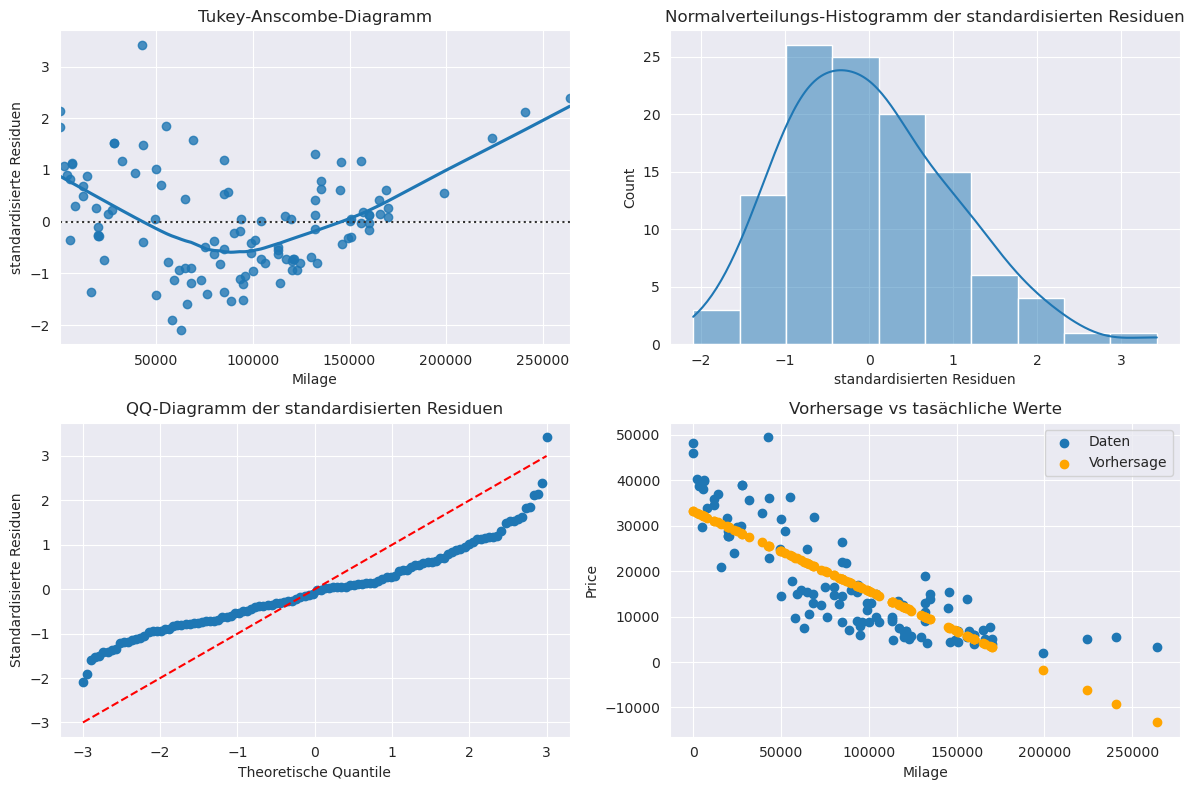

In [315]:
#-----------Diagnostische Plots für unveränderte Variablen-----------------------------------

X = train['Milage']
y = train['Price']

X_mean = np.mean(X)
y_mean = np.mean(y)

#-------------------------Linear Model------------------------- 
b1 = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
b0 = y_mean - b1 * X_mean

y_pred = b1 * X + b0 
x = X.ravel()

#---------------------standardisieren---------------------
Res = y - y_pred
means = Res.mean()
stds = Res.std()
standRes = (Res - means) / stds


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# ---------------------Tukey---------------------
sns.residplot(x='Milage', y=standRes, data=train, ax=axes[0, 0], lowess=True)
axes[0, 0].set_ylabel('standardisierte Residuen')
axes[0, 0].set_title('Tukey-Anscombe-Diagramm')

# ---------------------Histogramm---------------------
sns.histplot(standRes, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('standardisierten Residuen')
axes[0, 1].set_title('Normalverteilungs-Histogramm der standardisierten Residuen')

# ---------------------QQ-Diagramm---------------------
sorted_res = np.sort(standRes)
theor_quantiles = np.linspace(-3, 3, len(standRes))

axes[1, 0].scatter(theor_quantiles, sorted_res)
axes[1, 0].plot([-3, 3], [-3, 3], 'r--')
axes[1, 0].set_title('QQ-Diagramm der standardisierten Residuen')
axes[1, 0].set_xlabel('Theoretische Quantile')
axes[1, 0].set_ylabel('Standardisierte Residuen')

# ---------------------Vorhersagen---------------------
axes[1, 1].scatter(X, y, label='Daten')
axes[1, 1].scatter(X, y_pred, color='orange', label='Vorhersage')
axes[1, 1].set_title('Vorhersage vs tasächliche Werte')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_xlabel('Milage')
plt.legend()

fig.tight_layout()
plt.show()




Tukey-Ascombe: <br/>Wenn die Beziehung zwischen den Residuen und der unabhängigen Variablen linear ist, sollten die Punkte im Diagramm ungefähr auf einer geraden Linie liegen. In diesem Fall ist die Beziehung zwischen den Residuen und der unabhängigen Variablen ungefähr linear mit stärkeren Aussreissern bei tiefen und hochen Milage-Werten.
<br/>Wenn die Residuen unabhängig voneinander sind, sollten die Punkte im Diagramm zufällig verteilt sein. Der lowess (blaue Linie) zeigt den Mittelwert der Residuen horizontal übereinander in einem gewissen x-Achsenabschnitt. An diesem sieht man, dass die Verteilung der Residuen schwankt und zwar von 0-50'000 stark positiv, 50'000 - 150'000 negativ und darüber wieder stark positiv. Damit sind die Residuen nicht unabhängig voneinander.<br/>
<br/>Normalverteilungshistogramm:<br/> 
Die Normalverteilung ist leicht linkssteil, man sieht daher nochmals, dass die Residuen öfters negativ sind.<br/>
<br/>QQ-Plot:<br/> Wenn die Residuen Normalverteilt wären, wären die blauen Punkte auf der roten Ideallinie. Dies ist hier deutlich nicht der Fall.<br/>
<br/>Vorhersage vs tatsächliche Werte:<br/>
 Hier sieht man die absoluten Werte der Vorhersage durch das Modell (orange) und die tasächlichen Daten (blau). Dieser Plot zeigt wie das Tukey-Ascombe Diagramm, dass die Vorhersagen bei kleinen Milage Werten, meistens zu tief sind, in der Mitte meistens zu hoch und bei hohen Milage Werten wieder zu tief. Es ist nicht so klar ersichtlich wie im Tukey-Ascombe, jedoch etwas einfacher verständlich.

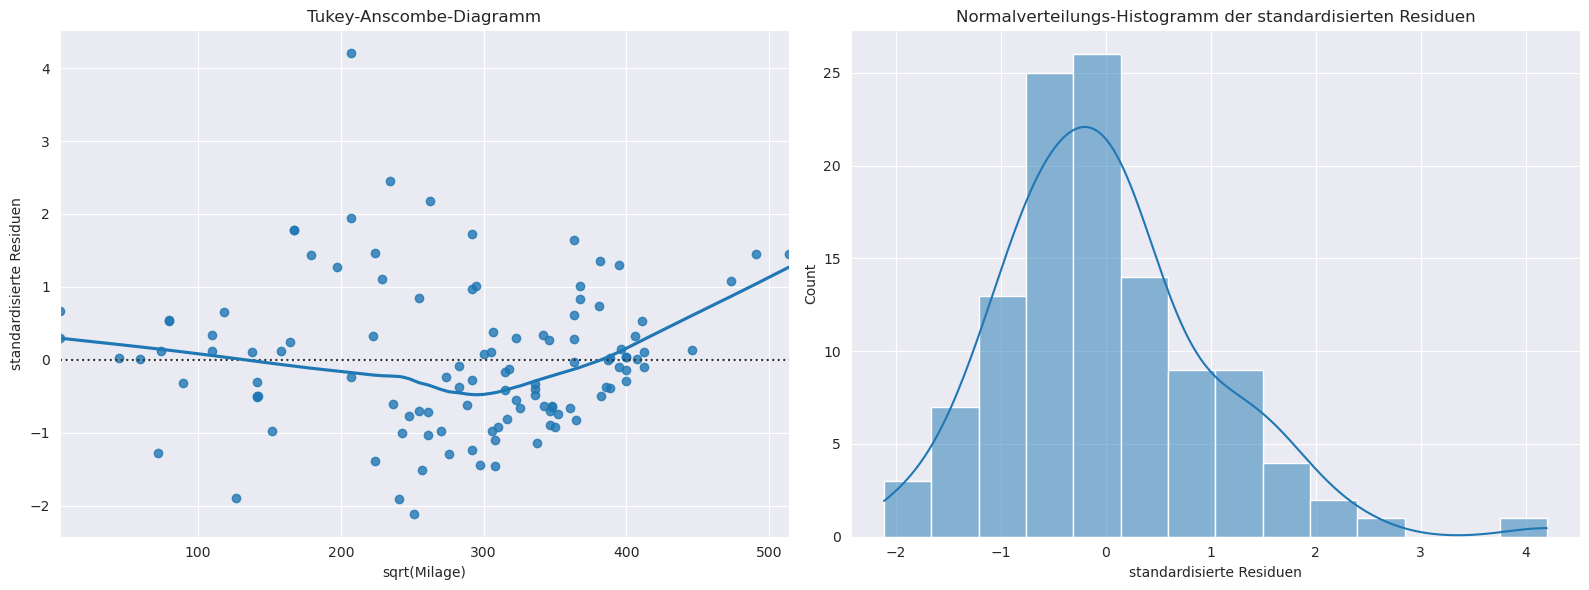

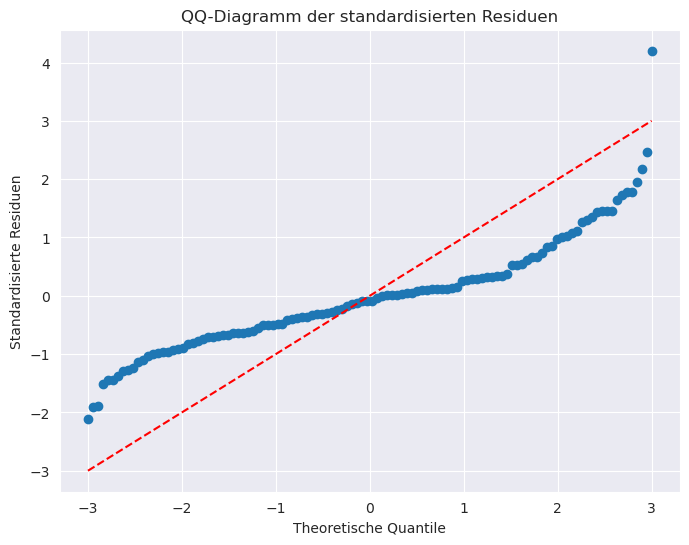

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


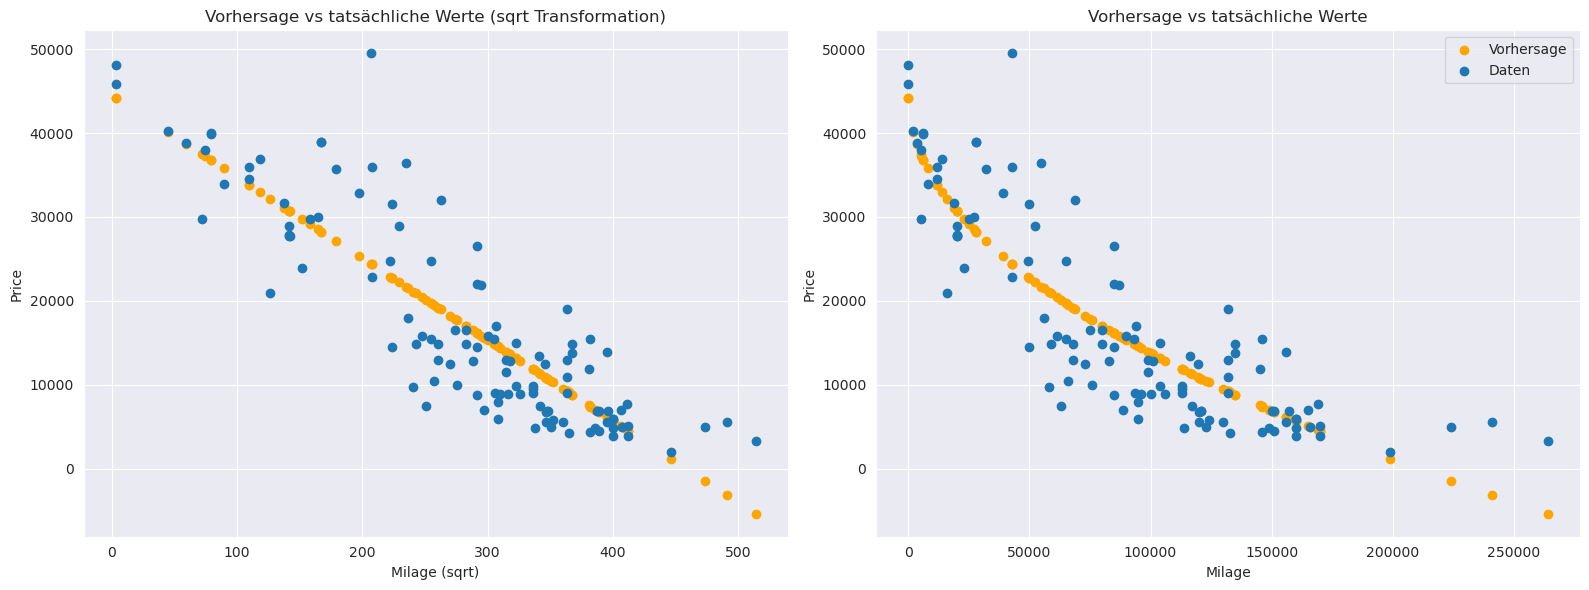

In [316]:
train8 = train.copy()
X = train8['Milage'].values.reshape(-1, 1)
X_sqrt = np.sqrt(X) 
train8['sqrt(Milage)'] = X_sqrt

# ---------------------Calculations with square root of Mileage---------------------
X_sqrt_mean = np.mean(train8['sqrt(Milage)'])
y_mean = np.mean(y)

b1 = np.sum((train8['sqrt(Milage)'] - X_sqrt_mean) * (y - y_mean)) / np.sum((train8['sqrt(Milage)'] - X_sqrt_mean)**2)
b0 = y_mean - b1 * X_sqrt_mean

y_pred = b1 * train8['sqrt(Milage)']  + b0

#---------------------Standardisieren---------------------
Res = y - y_pred
means = Res.mean()
stds = Res.std()
standRes = (Res - means) / stds


fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
# ---------------------Tukey---------------------
sns.residplot(x='sqrt(Milage)', y=standRes, data=train8, ax=axes[0], lowess=True)
axes[0].set_ylabel('standardisierte Residuen')
axes[0].set_title('Tukey-Anscombe-Diagramm')

# ---------------------Histogramm---------------------
sns.histplot(standRes, kde=True, ax=axes[1])
axes[1].set_xlabel('standardisierte Residuen')
axes[1].set_title('Normalverteilungs-Histogramm der standardisierten Residuen')

fig.tight_layout()  # Adjust spacing to prevent overlaps
plt.show()

# ---------------------QQ-Diagramm---------------------
sorted_res = np.sort(standRes)
quant = np.linspace(-3, 3, len(standRes))

plt.figure(figsize=(8, 6))
plt.scatter(quant, sorted_res)
plt.plot([-3, 3], [-3, 3], 'r--')
plt.title('QQ-Diagramm der standardisierten Residuen')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Standardisierte Residuen')
plt.show()

# ---------------------Vorhersagen---------------------
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subplot 1: X_sqrt Transformation
ax1.scatter(X_sqrt, y_pred, color='orange', label='Vorhersage')
ax1.scatter(X_sqrt, y, label='Daten')
ax1.set_title('Vorhersage vs tatsächliche Werte (sqrt Transformation)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Milage (sqrt)')
plt.legend()

# Subplot 2: Original X values
ax2.scatter(X, y_pred, color='orange',label='Vorhersage')
ax2.scatter(X, y, label='Daten')
ax2.set_title('Vorhersage vs tatsächliche Werte')
ax2.set_ylabel('Price')
ax2.set_xlabel('Milage')
plt.legend()

# Adjust layout and show plots
fig.tight_layout()
plt.show()

Tukey-Ascombe: <br/>
Hier ist deutlich zu sehen, dass durch das Wurzel ziehen der Variable 'Milage' die Residuen näher bei 0 sind und vorallem zufälliger Verteilt sind. Die hohen Residuen bei hohen Milage-Werten sind zwar nicht gaz gelöst, jedoch sind sie bei niedrigen Werten eindeutig geschrumpft.
<br/>
<br/>Normalverteilungshistogramm & QQ-Plot: <br/>
Die Residuen scheinen immernoch etwas linkssteil zu sein und sind daher immernoch nicht perfekt Normalverteilt. Man kann beim Normalverteilungshistogramm jedoch auch eine kleine Verbesserung sehen. Beim QQ-Plot ist diese jedoch nicht ersichtlich.
<br/>

<br/>Vorhersage vs tatsächliche Werte: <br/>
Die Vorhersagen mit den transformierten Milage-Werten, wurde links mit den transormierten Werten auf der X-Achse dargestellt. Die Werte scheinen eine leicht bessere Lineatität zu haben als zuvor. <br/>
Besser ersichtlich wird dies, wenn man wie beim rechten Plot, die Vorhersagen mit den tatsächlichen Werten auf der X-Achse zeigt. Die Kurve der Vorhersagen flacht sich ab und geht daher nicht mehr so stark in den negativen Raum, womit er sich unseren Daten anpasst.


### Optimierung des Ridge-Regression-Modell

Im folgenden wurde das Modell mit den behandelten Methoden optimiert

In [317]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import math
ctrain = train.copy()

#----------------Transformieren:----------------
ctrain['sqrt(Milage)'] = np.sqrt(ctrain['Milage'])
ctrain['sqrt(HP)'] = np.sqrt(ctrain['HP'])
ctrain['sqrt(Age)'] = np.sqrt(ctrain['Age'])

#----------------Standardisieren:----------------
numerical_columns = ['Milage', 'HP', 'Age','sqrt(Milage)','sqrt(HP)','sqrt(Age)']
means = ctrain[numerical_columns].mean()
stds = ctrain[numerical_columns].std()
ctrain[numerical_columns] = (ctrain[numerical_columns] - means) / stds

Xtrain = ctrain.drop('Price', axis=1)
ytrain = ctrain.Price.to_numpy().reshape(len(ctrain.Price.to_numpy()))

#----------------Bestes Alphas--------------------
param_grid = {'alpha': np.linspace(0, 10, 100)} 
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(Xtrain, ytrain)

bestAlpha = grid_search.best_params_['alpha']
print(f'Alpha: {bestAlpha}')

#----------------Modell erstellen--------------------
model = RidgeRegression(opt_method='neq',alpha=bestAlpha, eta=0.0001, maxsteps=10000, eps=0.000001)
model.fit(Xtrain, ytrain)

predicted = model.predict(Xtrain)
mae = np.mean(np.abs(ytrain - predicted))
print("MAE: ", mae)
score = 1 - (np.sum((ytrain - predicted) ** 2) / np.sum((ytrain - ytrain.mean()) ** 2))
print(f'score: {score}')

Alpha: 0.10101010101010101
MAE:  2132.004059330261
score: 0.9097821100646455


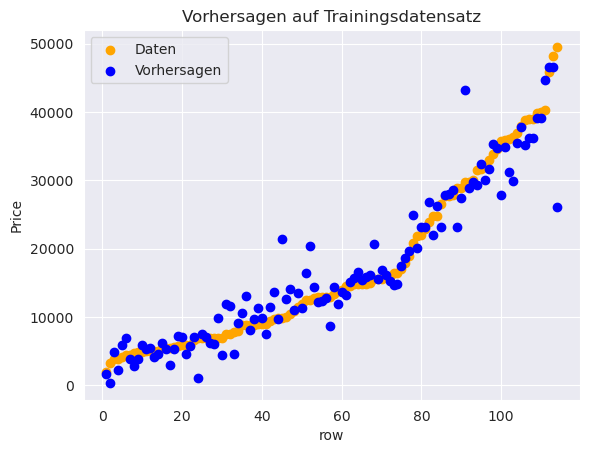

In [318]:
x = np.arange(1, len(ytrain) + 1)
plt.scatter(x, ytrain, label='Daten', color='orange')
plt.scatter(x, model.predict(Xtrain), label='Vorhersagen', color='blue')
plt.xlabel('row')
plt.ylabel('Price')
plt.title('Vorhersagen auf Trainingsdatensatz')
plt.legend()
plt.show()

Zu sehen sind die Vorhersagen meines Modells (blau) auf den Trainingsdatensatz (gelb) nach Preis sortiert. Die Vorhersagen sind bis auf ein paar Ausreisser nicht schlecht. <br/> 
Die metrischen Variablen Milage, HP & Age wurden standardisiert und die Wurzel der Werte wurde als neue Varible hinzugefügt. Dies führte zu deutlich besseren Vorhersagen nach MAE & score.

MAE:  2909.5843818463004
score: 0.9230472167256414


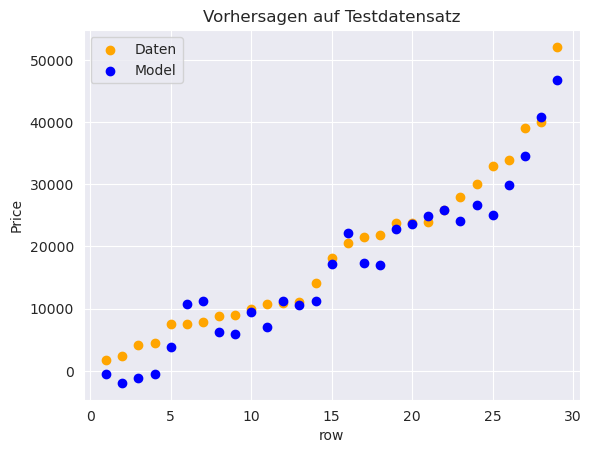

In [319]:
ctest = test.copy()

#----------------Transformieren:----------------
ctest['sqrt(Milage)'] = np.sqrt(ctest['Milage'])
ctest['sqrt(HP)'] = np.sqrt(ctest['HP'])
ctest['sqrt(Age)'] = np.sqrt(ctest['Age'])

#----------------Standardisieren:----------------
numerical_columns = ['Milage', 'HP', 'Age','sqrt(Milage)','sqrt(HP)','sqrt(Age)']
means = ctest[numerical_columns].mean()
stds = ctest[numerical_columns].std()
ctest[numerical_columns] = (ctest[numerical_columns] - means) / stds

Xtest = ctest.drop('Price', axis=1)
ytest = ctest.Price.to_numpy().reshape(len(ctest.Price.to_numpy()))
predicted = model.predict(Xtest)

mae = np.mean(np.abs(ytest - predicted))
print("MAE: ", mae)
score = 1 - (np.sum((ytest - predicted) ** 2) / np.sum((ytest - ytest.mean()) ** 2))
print(f'score: {score}')

x = np.arange(1, len(ytest) + 1)
plt.scatter(x, ytest, label='Daten', color='orange')
plt.scatter(x, model.predict(Xtest), label='Model', color='blue')
plt.xlabel('row')
plt.ylabel('Price')
plt.title('Vorhersagen auf Testdatensatz')
plt.legend()
plt.show()

Hier sind die Vorhersagen meines Modells (blau) auf den Testdatensatz (gelb) nach Preis sortiert dargestellt. 

MAE:  2909.5843818463004
score: 0.9230472167256414
Mittelwert y: 18816.896551724138


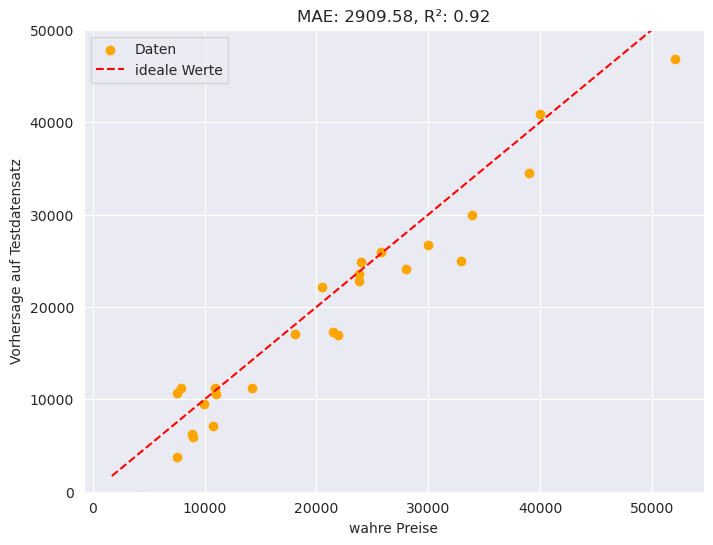

In [320]:
print("MAE: ", mae)
print(f'score: {score}')
print(f'Mittelwert y: {ytest.mean()}')
sq = chr(0xB2)
perfekte_vorhersage = np.linspace(1,50000, len(ytest))

plt.figure(figsize=(8, 6))
x = np.arange(1, len(ytest) + 1)
plt.scatter(ytest, predicted, label='Daten', color='orange')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', label='ideale Werte')
plt.xlabel('wahre Preise')
plt.ylabel('Vorhersage auf Testdatensatz')
plt.ylim(0, 50000)
plt.title(f'MAE: {mae:.2f}, R{sq}: {score:.2f}')
plt.legend()
plt.show()

Hier wird die Korrelation der geschätzen Preise ($\hat y$) auf der y- und den wahren Preise ($y$) auf der x-Achse dargestellt. <br/> 
Die rote Linie zeigt wo die ideal Korrelation der Werte wäre also wo $\hat y$ und $y$ gleich sind.<br/> 
Der Ideale Wert von R^2 ist 1. Mit einem R^2 von 0.92 ist die Korrelation sehr stark, daher sind die Vorhersagen nicht schlecht.<br/> 
Wie gut der MAE ist, ist abhängig von der höhe der Daten, weshalb ich noch den Mittelwert der Preise geprinted habe. Bei einem durchnittlichen Preis von 18'817 liegen meine Vorhersagen um 2'909 daneben, das heisst um durchschnittlich 15%. 
<br/> Es ist somit ein brauchbares Modell sollte jedoch sicher noch mit mehr Trainingsdaten verbessert werden.

### Train-Test-split

Nun wurde erneut das beste Ridge-Regression-Modell etwas vertieft betrachtet. Dieser Modell-Ansatz wurde auf jeweils $[\frac{1}{10}, \frac{2}{10}, \frac{3}{10}, .., \frac{10}{10}]$ der Trainingsdaten trainiert, jeweils 10 Mal mit zufällig anders ausgewählten Trainingsdaten. Ein Plot wurde erstellt, bei dem der Mittelwert der Kostenfunktion für die Trainings- und Testdaten auf der y-Achse und der Trainingsdatenanteil auf der x-Achse liegt.


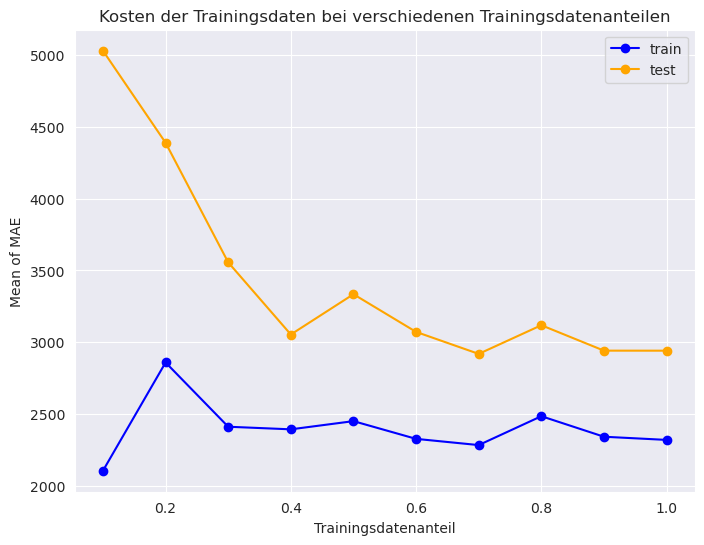

In [321]:
import numpy as np

trainPrep = train.copy()
testPrep = test.copy()

#--------------Variablentransformation-----------------
trainPrep['sqrt(Milage)'] = np.sqrt(trainPrep['Milage'])
trainPrep['sqrt(HP)'] = np.sqrt(trainPrep['HP'])
trainPrep['sqrt(Age)'] = np.sqrt(trainPrep['Age'])

testPrep['sqrt(Milage)'] = np.sqrt(testPrep['Milage'])
testPrep['sqrt(HP)'] = np.sqrt(testPrep['HP'])
testPrep['sqrt(Age)'] = np.sqrt(testPrep['Age'])

#--------------standardisieren-----------------
train_frac = np.linspace(0.1, 1.0, 10)
random_samples = np.linspace(1, 10, 10)

mae_train = []
mae_test = []

standtrain = trainPrep.copy()
numerical_columns = ['Milage', 'HP', 'Age']
means = trainPrep[numerical_columns].mean()
stds = trainPrep[numerical_columns].std()
standtrain[numerical_columns] = (standtrain[numerical_columns] - means) / stds

standtest = testPrep.copy()
numerical_columns = ['Milage', 'HP', 'Age']
means = testPrep[numerical_columns].mean()
stds = testPrep[numerical_columns].std()
standtest[numerical_columns] = (standtest[numerical_columns] - means) / stds
for i in range(len(train_frac)):
    mae_train_means = []
    mae_test_means = []
    model = RidgeRegression(opt_method='neq',eta=0.0001, maxsteps=1000)

    for s in random_samples:

        n_samples = len(standtrain)
        train_size = train_frac[i]
        split_index = int(n_samples * train_size)
        df2 = standtrain.sample(frac=1).reset_index(drop=True)

        train10 = df2.iloc[:split_index, :]
        test10 = standtest

        Xtrain = train10.drop('Price', axis=1)
        ytrain = train10.Price.to_numpy().reshape(len(train10.Price.to_numpy()))

        Xtest = test10.drop('Price', axis=1)
        ytest = test10.Price.to_numpy().reshape(len(test10.Price.to_numpy()))
        model.fit(Xtrain, ytrain)
        mae_train_means.append(np.mean(np.abs(ytrain - model.predict(Xtrain))))

        mae_test_means.append(np.mean(np.abs(ytest - model.predict(Xtest))))

    mae_train.append(np.mean(mae_train_means))
    mae_test.append(np.mean(mae_test_means))


plt.figure(figsize=(8, 6))

plt.plot(train_frac, mae_train,  label='train',  color='b', marker='o')
plt.plot(train_frac, mae_test, label='test',  color='orange', marker='o')

plt.xlabel('Trainingsdatenanteil')
plt.ylabel('Mean of MAE')
plt.title('Kosten der Trainingsdaten bei verschiedenen Trainingsdatenanteilen')
plt.legend()
plt.show()


Hier werden die Mittelwerte der MAE auf der y-Achse bei den verschiedenen Testdatengrössen $[\frac{1}{10}, \frac{2}{10}, \frac{3}{10}, .., \frac{10}{10}]$ (x-Achse) bei dem Testdatensatz (orange) und Trainingsdatensatz (blau) dargestellt. 10/10 des Testdatensatzes sind also wieder 80% der gesamten Daten und wie man in der Grafik sieht sind daher die Kosten des Testdatensatzes etwa bei 2'900 und der Trainingsdaten auf ca. 2'300, was mit Aufgabe 9 etwa übereinstimmt.<br/>
Es wird ausserdem ersichtlich, dass bei einem grösseren Trainingsdatensatz die Kosten bei den Testdaten sinken. Die Kosten schwanken jedoch noch ein wenig, aufgrund der zufälligen Aufteilung der Testdatensätze. Wenn die Verteilung der Daten (z.B. nur niedrige Milage/ HP Werte) in den jeweils 10 Datensätzen schlecht ist, kann es auch mal sein, dass die Kosten beim Test bei $\frac{8}{10}$ Trainingsdatengrösse höher sind als bei $\frac{7}{10}$. <br/>
Die Kosten bei den Trainingsdaten bleiben meistens ungefähr gleich hoch. Dies zeigt dass die Kosten beim Trainingsdatensatz kein guter Indikator sind um die Genauigkeit eines Modelles zu veranschaulichen.

### Vergleich verschiedener Modelle nach MAE

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet


#------------------transformierte Variablen verbessern alle Modelle (ausser KNN)--------------------------------
train11 = train.copy()
train11['sqrt(Milage)'] = np.sqrt(train11['Milage'])
train11['sqrt(HP)'] = np.sqrt(train11['HP'])
train11['sqrt(Age)'] = np.sqrt(train11['Age'])

X_train = train11.drop('Price', axis=1)
y_train = train11.Price

test11 = test.copy()
test11['sqrt(Milage)'] = np.sqrt(test11['Milage'])
test11['sqrt(HP)'] = np.sqrt(test11['HP'])
test11['sqrt(Age)'] = np.sqrt(test11['Age'])

X_test = test11.drop('Price', axis=1)
y_test = test11.Price

model_lr = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=6)
model_rf = RandomForestRegressor(n_estimators=100)
model_en = ElasticNet()

model_lr.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_en.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
y_pred_knn = model_knn.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_en = model_en.predict(X_test)

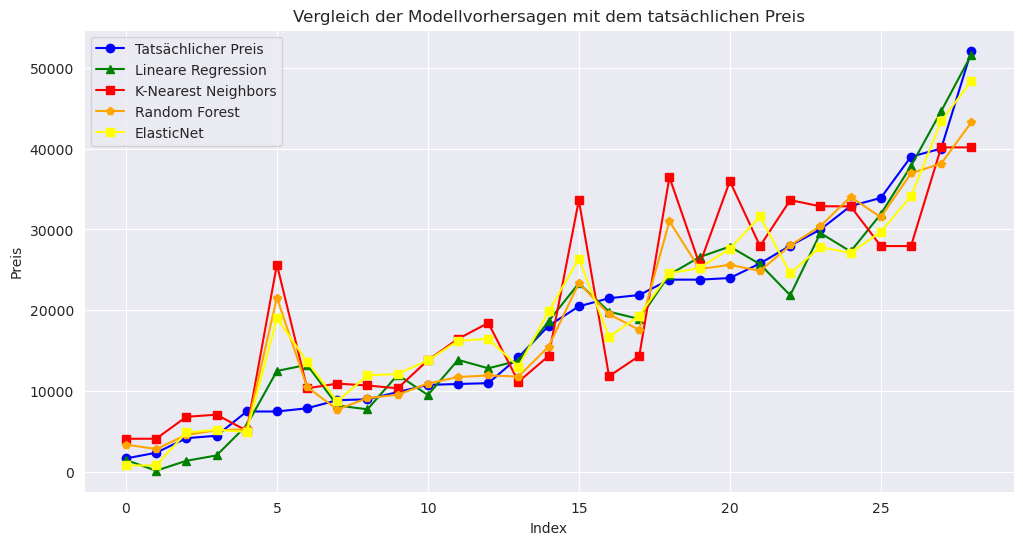

In [323]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.reset_index(drop=True), label='Tatsächlicher Preis', marker='o', color='blue')
plt.plot(y_pred_lr, label='Lineare Regression', marker='^', color='green')
plt.plot(y_pred_knn, label='K-Nearest Neighbors', marker='s', color='red')
plt.plot(y_pred_rf, label='Random Forest', marker='p', color='orange')
plt.plot(y_pred_en, label='ElasticNet', marker='s', color='yellow')

plt.xlabel('Index')
plt.ylabel('Preis')
plt.title('Vergleich der Modellvorhersagen mit dem tatsächlichen Preis')
plt.legend()
plt.show()

Darstellung der Vorhersagen mit den verschiedenen Modellen und den Tatsächlichen Werten als Referenz in blau. Auffällig ist, dass die vorhersagen meistens bei den selben Datenpunkten stark falsch liegen, was auf Aussreisser im Testdatensatz hindeutet. Hier ist bereits ersichtlich, dass K-Nearest Neighbor nicht besonders gute Vorhersagen trifft, wobei Lineare Regression und Random Forest sehr nahe bei der blauen Linie bleiben, daher gute Vorhersagen treffen.

#### $\hat y$ vs $y$-Plots
Im folgenden wird die Ähnlichkeit der Vorhersagen der Verschieden Modelle mit den tatsächlichen Werten dargestellt. Die gestrichelte rote Linie zeigt wieder, wo die Punkte liegen müssten, damit es eine ideale Vorhersage wäre. Je weiter die Punkte von dieser Linie abweichen, desto schlechter sind die Vorhersagen.

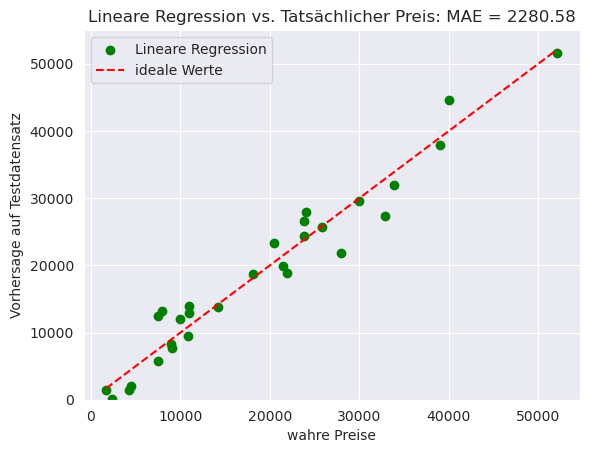

In [324]:
mae_lr = np.mean(np.abs(y_test - y_pred_lr))
plt.scatter(ytest, y_pred_lr, label='Lineare Regression', color='green')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', label='ideale Werte')
plt.xlabel('wahre Preise')
plt.ylabel('Vorhersage auf Testdatensatz')
plt.ylim(0, 55000)
plt.title(f'Lineare Regression vs. Tatsächlicher Preis: MAE = {mae_lr:.2f}')
plt.legend()
plt.show()


Die Lineare Regression ist ein einfaches Modell, hat also schnelle Berechnungszeit und geringen Speicherbedarf. Es scheint gut mit unserem Datensatu zusammen zu passen, da es einen besseren MAE hat, als das selbst erstellte RidgeRegression Modell.

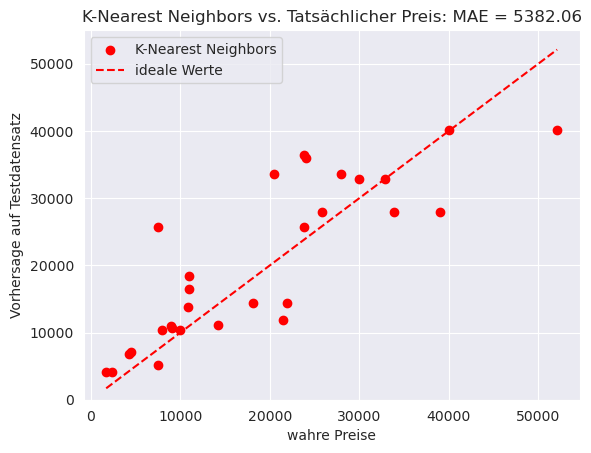

In [325]:
mae_knn = np.mean(np.abs(y_test - y_pred_knn))
plt.scatter(ytest, y_pred_knn, label='K-Nearest Neighbors', marker='o', color='red')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', label='ideale Werte')
plt.xlabel('wahre Preise')
plt.ylabel('Vorhersage auf Testdatensatz')
plt.ylim(0, 55000)
plt.title(f'K-Nearest Neighbors vs. Tatsächlicher Preis: MAE = {mae_knn:.2f}')
plt.legend()
plt.show()

Der hohe MAE und die stark Abweichung der Punkte von der Ideallinie, deuten darauf hin, dass KNN nicht das ideale Modell für diesen Datensatz ist. <br/>
 Es sollte Robuster gegenüber Ausreißern sein und komplexe, nichtlineare Beziehungen modellieren können. <br/>
 Die schlechten Vorhersagen könnten daran liegen dass der K-Wert nicht richtig gesetzt wurde oder das KNN empfindlich gegenüber Skalierung ist.

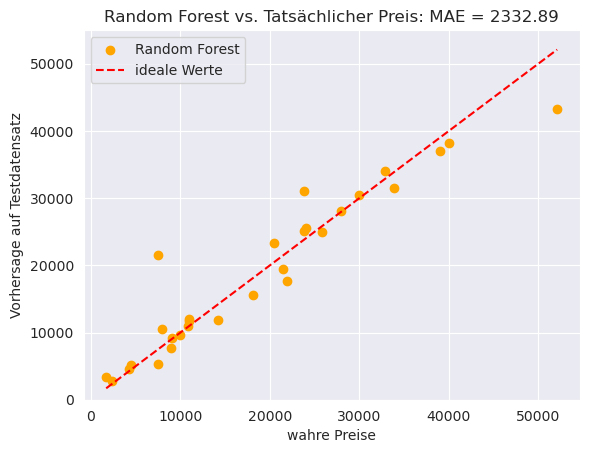

In [326]:
mae_rf = np.mean(np.abs(y_test - y_pred_rf))
plt.scatter(ytest, y_pred_rf, label='Random Forest', marker='o', color='orange')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', label='ideale Werte')
plt.xlabel('wahre Preise')
plt.ylabel('Vorhersage auf Testdatensatz')
plt.ylim(0, 55000)
plt.title(f'Random Forest vs. Tatsächlicher Preis: MAE = {mae_rf:.2f}')
plt.legend()
plt.show()

Random Forest hat einen tiefen MAE und trifft somit gute Vorhersagen für das Modell. In der Grafik ist zu sehen das zwei grobe Aussreisser den MAE wahrscheinlich verschlechtern. <br/>
Random Forest Kann komplexe, nichtlineare Beziehungen modellieren und hat geringen Speicherbedarf.
Er ist jedoch schwieriger zu optimieren als andere Modelle und die Berechnungszeit kann bei großen Datensätzen hoch sein.


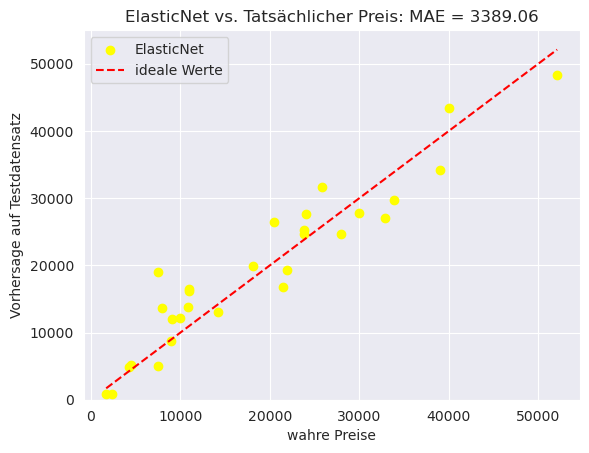

In [327]:
mae_en = np.mean(np.abs(y_test - y_pred_en))
plt.scatter(ytest, y_pred_en, label='ElasticNet',  color='yellow')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', label='ideale Werte')
plt.xlabel('wahre Preise')
plt.ylabel('Vorhersage auf Testdatensatz')
plt.ylim(0, 55000)
plt.title(f'ElasticNet vs. Tatsächlicher Preis: MAE = {mae_en:.2f}')
plt.legend()
plt.show()

Elastic Net kombiniert die Vorteile von Ridge-Regression und Lasso-Regression es kann also sowohl L1- als auch L2-Regularisierung verwenden. <br/>
Die Wahl der richtigen Regularisierungsparameter kann jedoch schwierig sein, weshalb es wahrscheinlich in diesem Fall, nach MAE nicht so gut abgeschnitten hat, wie andere Modelle.